In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sco

In [2]:
fb = pdr.get_data_yahoo('FB')['2013-11-07':]
twtr = pdr.get_data_yahoo('TWTR')['2013-11-07':]
crm = pdr.get_data_yahoo('CRM')['2013-11-07':]

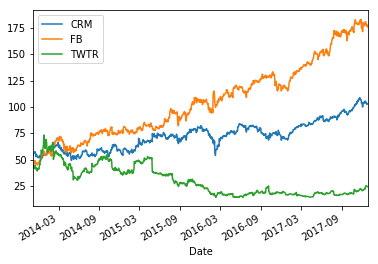

In [3]:
df = pd.DataFrame(data={
    'FB': fb['Close'],
    'TWTR': twtr['Close'],
    'CRM': crm['Close']
}).fillna(method='bfill')

df.plot()
plt.show()

In [4]:
def create_portfolio(df, fb_p, twtr_p, crm_p):
    return pd.DataFrame(data={
        'FB': df['FB'],
        'TWTR': df['TWTR'],
        'CRM': df['CRM'],
        'Value': fb_p * df['FB'] + twtr_p * df['TWTR'] + crm_p * df['CRM']
    })

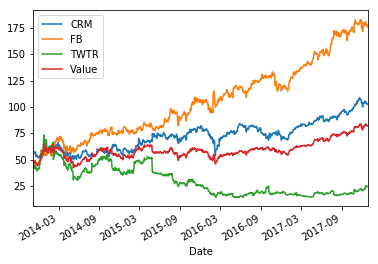

In [5]:
create_portfolio(df, 0.25, 0.5, 0.25).plot()
plt.show()

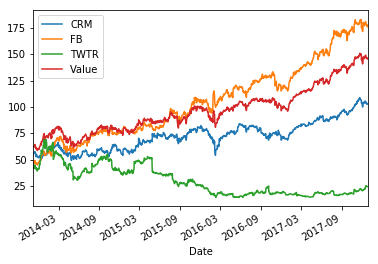

In [6]:
create_portfolio(df, 0.5, 0.25, 0.5).plot()
plt.show()

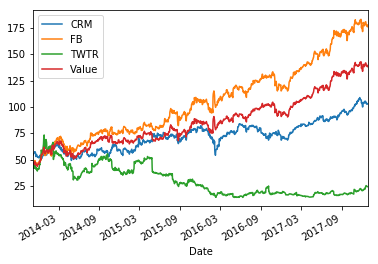

In [7]:
create_portfolio(df, 0.75, 0.25, 0).plot()
plt.show()

In [8]:
def sharpe_ratio(df):
    daily_returns = df['Value'][1:] / df['Value'][:-1].values
    daily_returns[df.iloc[0].name] = 0
    return np.sqrt(252) * daily_returns.mean() / daily_returns.std()

In [9]:
sharpe_ratio(create_portfolio(df, 0.5, 0.25, 0.25))

456.59925888456178

In [10]:
sharpe_ratio(create_portfolio(df, 0.25, 0.375, 0.375))

454.31236895579912

In [11]:
sharpe_ratio(create_portfolio(df, 0.75, 0.125, 0.125))

452.71835792526872

     fun: -459.8761259995395
     jac: array([ 0.00112915, -0.00154495, -0.00067139])
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([ 0.42726628,  0.10600229,  0.46673143])


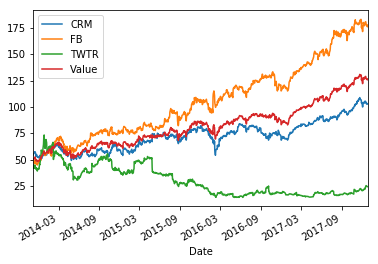

In [12]:
def f(x):
    return - sharpe_ratio(create_portfolio(df, x[0], x[1], x[2]))

bounds = ((0, 1), (0, 1), (0, 1))
constraints = {'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] - 1}
result = sco.minimize(f, [0.5, 0.25, 0.25], bounds=bounds, constraints=constraints)
print(result)

pdf = create_portfolio(df, *result.x)
pdf.plot()
plt.show()

In [13]:
pdf['Value'].iloc[len(pdf) - 1] / pdf['Value'].iloc[0]

2.5112713417787962